In [7]:
import numpy as np
import healpy as hp
from astropy.io import ascii
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
print 'Reading files'
w = ascii.read('wen.csv') 
r = fits.open('redmapper.fits') 
r = r[1].data
print len(w)
print len(r)

Reading files
132684
26111


In [5]:
r['RA'], r['DEC']

(array([ 239.58332907,  250.08254839,  197.87295717, ...,  180.83079888,
         153.82422578,  135.96337099]),
 array([ 27.23341292,  46.71153135,  -1.34111628, ...,  52.37043161,
         43.63535754,  15.20173173]))

In [35]:
NSIDE = 8

In [11]:
phi = np.deg2rad(r['RA'])
theta = np.deg2rad(90.-r['DEC'])

In [21]:
rpix = hp.ang2pix(NSIDE, theta, phi)

In [36]:
m = np.arange(hp.nside2npix(NSIDE))

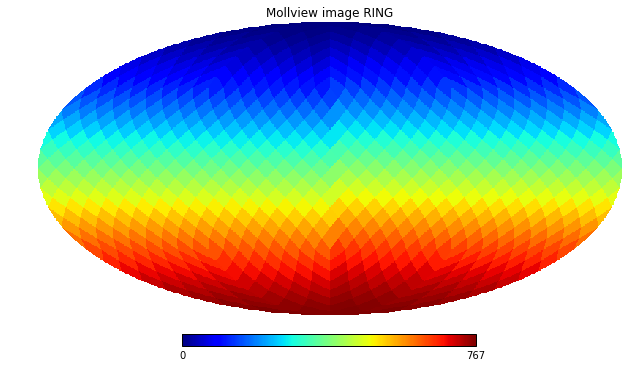

In [38]:
hp.mollview(m, title="Mollview image RING")

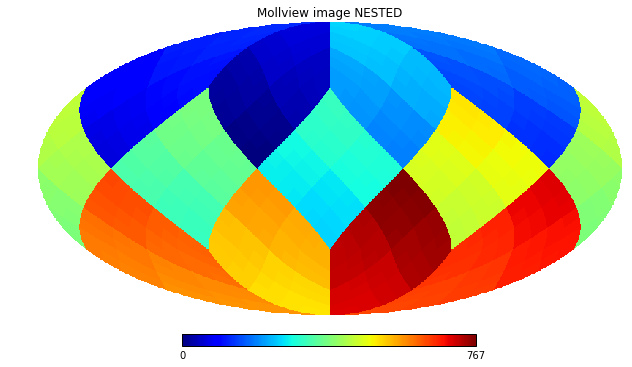

In [39]:
hp.mollview(m, nest=True, title="Mollview image NESTED")